In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Arquivo
file_path = r"C:\Users\Gabriel\Desktop\Estudos\Portifólio\Churn\Data & Resources\Data\Prediction_Data.xlsx"

# Página do Excel
sheet_name = 'vw_ChurnData'

# Lendo os dados no pandas
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Mostrando a tabela
print(data.head())

  ID_Cliente     Genero  Idade Casado          Estado  Numero_de_Indicacoes  \
0  11098-MAD   Feminino     30    Sim  Madhya Pradesh                     0   
1  11114-PUN  Masculino     51    Não          Punjab                     5   
2  11167-WES   Feminino     43    Sim     West Bengal                     3   
3  11179-MAH  Masculino     35    Não     Maharashtra                    10   
4  11180-TAM  Masculino     75    Sim      Tamil Nadu                    12   

   Tempo_de_Contrato_Meses Valor_de_Oferta Servico_Telefonico  \
0                       31        Oferta 1                Sim   
1                        9        Oferta 5                Sim   
2                       28        Oferta 1                Sim   
3                       12          Nenhum                Sim   
4                       27        Oferta 2                Sim   

  Multiplas_Linhas  ...   Metodo_Pagamento Valor_Mensal Total_Cobrado  \
0              Não  ...    Débito em Conta        95.10      

In [2]:
# Descartando as colunas que não serão usadas para predição, para não gerar tendências atoa
data = data.drop(['ID_Cliente', 'Categoria_Churn', 'Motivo_Churn','TV_Stream', 'Musica_Stream', 
                  'Dados_Ilimitados','Total_Reembolsado', 'Servico_Telefonico'], axis=1 ,)

# Listando colunas não numéricas para serem codificadas em "0" e "1"
columns_to_encode = [
    'Genero', 'Casado', 'Estado', 'Valor_de_Oferta', 'Multiplas_Linhas',
    'Servico_de_Internet', 'Tipo_de_Internet', 'Seguranca_Online', 'Backup_Online',
    'Protecao_de_Dispositivo', 'Suporte_Premium', 'Filmes_Stream',
    'Contrato', 'Fatura_Digital',
    'Metodo_Pagamento'
]

# Codificando colunas, exeto a coluna 'Status_Cliente'
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Codificando manualmente a coluna 'Customer_Status', para "Churned" ser "1"
data['Status_Cliente'] = data['Status_Cliente'].map({'Ativo': 0, 'Churn': 1})

# Separando os dados em características e alvos
X = data.drop('Status_Cliente', axis=1)
y = data['Status_Cliente']

# Separando os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [3]:
#Inicializar o Classificador de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=32)

# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

Confusion Matrix:
[[796  66]
 [123 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       862
           1       0.77      0.64      0.70       340

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



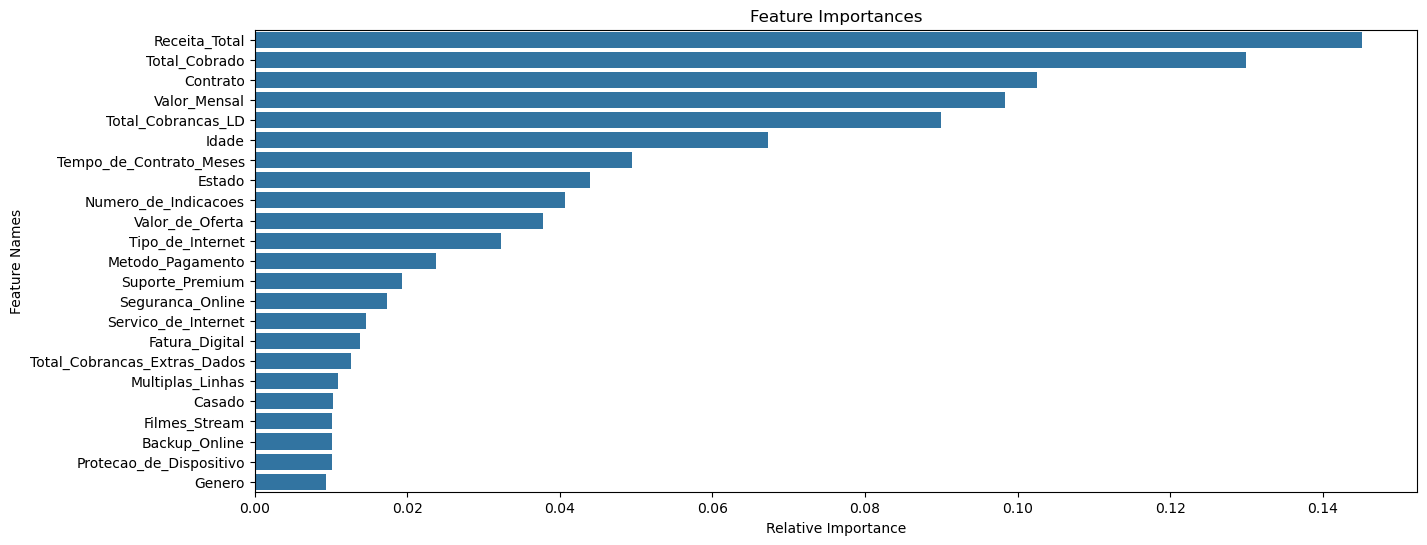

In [4]:
# __Avaliando o Modelo1__
# Fazendo predições
y_pred = rf_model.predict(X_test)

# Avaliando o modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Seleção de características por importância "feature importances"
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Comparando importância das caracteríticas
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [5]:
#Usando o modelo para previsão de novos dados
# Arquivo
file_path = r"C:\Users\Gabriel\Desktop\Estudos\Portifólio\Churn\Data & Resources\Data\Prediction_Data.xlsx"

# Página do Excel
sheet_name = 'vw_JoinData'

# Lendo os dados no pandas
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Mostrando a tabela
print(new_data.head())

# Mantendo o dataframe original para preservar colunas não codificadas
original_data = new_data.copy()

# Mantendo a coluna Customer_ID
customer_ids = new_data['ID_Cliente']

# Removendo colunas que não serão usadas para a previsão no dataframe codificado
new_data = new_data.drop(['ID_Cliente', 'Categoria_Churn', 'Motivo_Churn', 'Status_Cliente','TV_Stream',
                          'Musica_Stream', 'Total_Reembolsado', 'Servico_Telefonico','Dados_Ilimitados'], axis=1)

# Codificando Características usando os codificadores treinados e salvos anteriormente "label encoders"
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Fazendo previsões
new_predictions = rf_model.predict(new_data)

# Adicionando previsões no dataframe original
original_data['Customer_Status_Predicted'] = new_predictions

# Filtrando o dataframe para incluir somente os registros com Churn "= 1"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Salvando os resultados
original_data.to_csv(r"C:\Users\Gabriel\Desktop\Estudos\Portifólio\Churn\Data & Resources\Data\Predictions.csv", index=False)


  ID_Cliente     Genero  Idade Casado          Estado  Numero_de_Indicacoes  \
0  12340-DEL   Feminino     51    Sim           Delhi                     0   
1  12469-AND  Masculino     24    Sim  Andhra Pradesh                    11   
2  12490-TEL   Feminino     52    Não       Telangana                     9   
3  13666-UTT  Masculino     57    Sim     Uttarakhand                    15   
4  13744-AND   Feminino     41    Sim  Andhra Pradesh                     8   

   Tempo_de_Contrato_Meses Valor_de_Oferta Servico_Telefonico  \
0                       10          Nenhum                Sim   
1                        4          Nenhum                Sim   
2                        6          Nenhum                Sim   
3                       16          Nenhum                Sim   
4                        3        Oferta 5                Sim   

  Multiplas_Linhas  ...   Metodo_Pagamento Valor_Mensal Total_Cobrado  \
0              Não  ...  Cartão de Crédito        62.80      